# SDE solvers

In [1]:
from SDETestProblems import *
import numpy as np
import matplotlib.pyplot as plt
from Solvers import StdWeinerProcess, SDEsolverExplicitExplicit, SDEsolverImplicitExplicit

## Wiener process

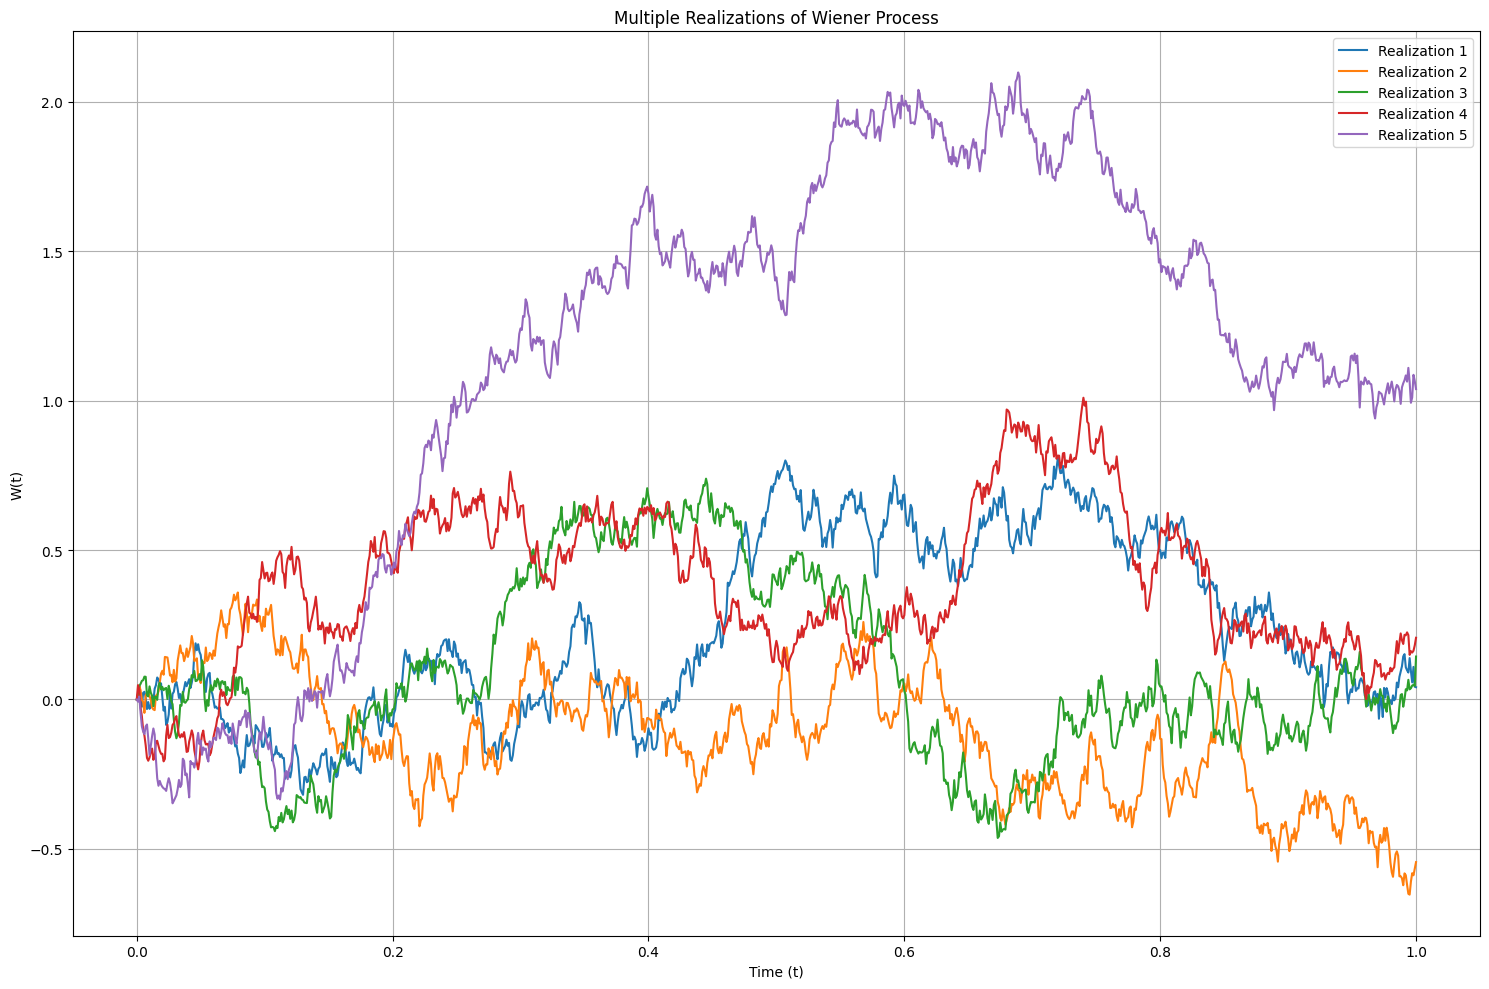

In [2]:
# Parameters
T = 1.0       # Total time
N = 1000      # Number of time steps
nW = 1        # Number of Wiener processes
Ns = 5        # Number of realizations (sample paths)
seed = 42     # For reproducibility

# Generate Wiener process
W, Tw, dW = StdWeinerProcess(T, N, nW, Ns, seed)

# Create figure with 3 subplots
plt.figure(figsize=(15, 10))

# Plot 1: Multiple realizations
for i in range(Ns):
    plt.plot(Tw, W[0,:,i], label=f'Realization {i+1}')
plt.title('Multiple Realizations of Wiener Process')
plt.xlabel('Time (t)')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Van der Pol

In [12]:
x0 = np.array([0.5, 0.5])
mu = 3
tf = 20
nw = 2
N = 1000
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))
X2 = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))
X2i = np.zeros((len(x0), N+1, Ns))


f, g, Jac = van_der_pol_model(mu, SDE = True, sigma = 0.05)
f2, g2, Jac2 = van_der_pol_model(mu, SDE2 = True, sigma = 0.05)

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    X2[:, :, i] = SDEsolverExplicitExplicit(f2, g2, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])
    X2i[:, :, i] = SDEsolverImplicitExplicit(f2, Jac2, g2, T, x0, W[:, :, i])



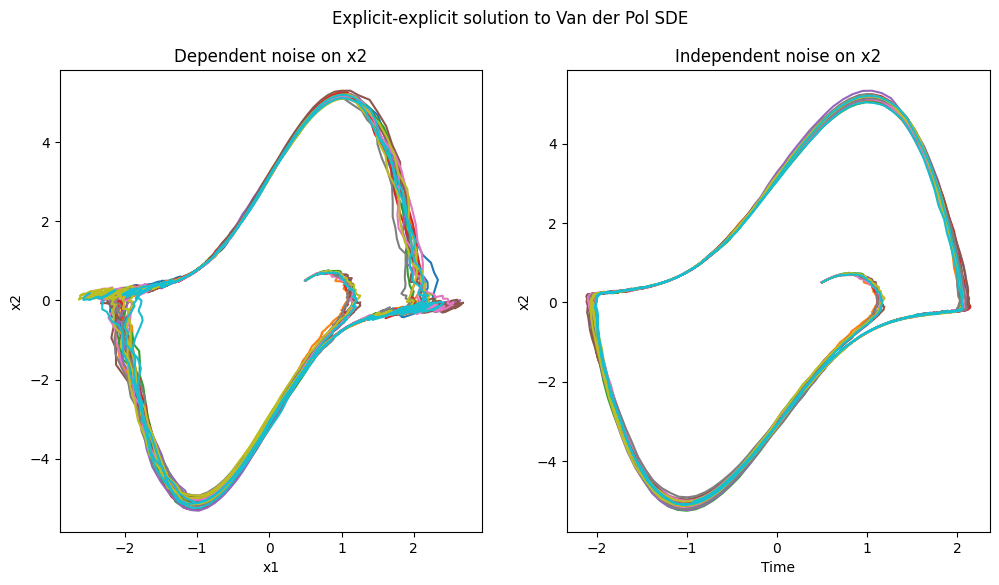

In [ ]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[0, :, i], X[1,:,i])
    ax2.plot(X2[0, :, i], X2[1,:,i])
ax1.set_title('Dependent noise on x2')
ax2.set_title('Independent noise on x2')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Explicit-explicit solution to Van der Pol SDE')
ax2.set_xlabel('Time')
plt.show()

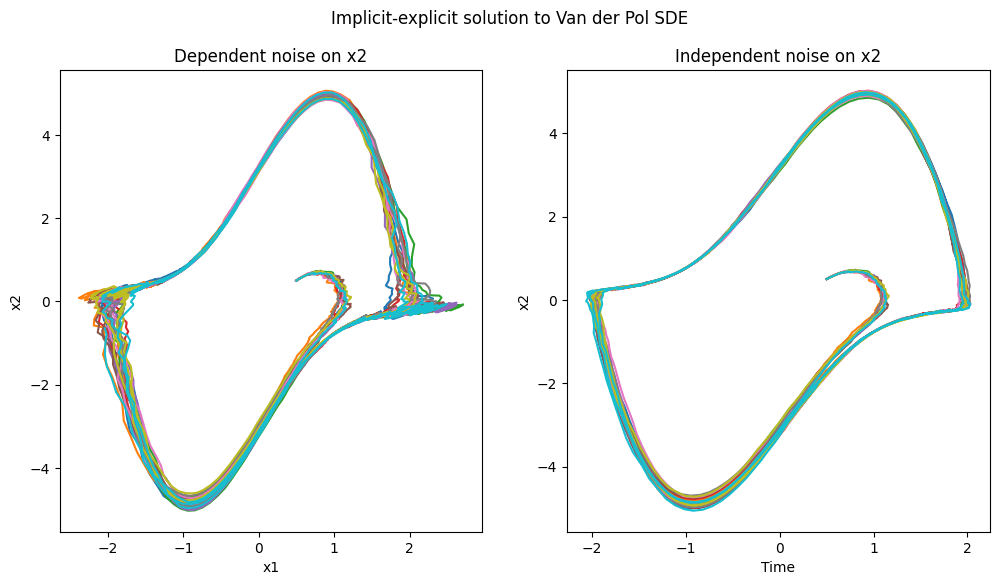

In [14]:

#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(Xi[0, :, i], Xi[1,:,i])
    ax2.plot(X2i[0, :, i], X2i[1,:,i])
ax1.set_title('Dependent noise on x2')
ax2.set_title('Independent noise on x2')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Implicit-explicit solution to Van der Pol SDE')
ax2.set_xlabel('Time')
plt.show()

In [15]:
x0 = np.array([0.5, 0.5])
mu = 3
tf = 20
nw = 2
N = 1000
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))
X2 = np.zeros((len(x0), N+1, Ns))
Xi = np.zeros((len(x0), N+1, Ns))
X2i = np.zeros((len(x0), N+1, Ns))


f, g, Jac = van_der_pol_model(mu, SDE = True, sigma = 0.1)
f2, g2, Jac2 = van_der_pol_model(mu, SDE2 = True, sigma = 0.1)

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, Jac, g, T, x0, W[:, :, i])



/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:48: RuntimeWarning: overflow encountered in scalar multiply
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:48: RuntimeWarning: overflow encountered in scalar power
  dydt = mu * (1 - x**2) * y - x
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:285: RuntimeWarning: invalid value encountered in add
  X[:, i+1] = X[:, i] + f(t[i], X[:, i]) * dt + g(t[i], X[:, i]) @ dW
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:56: RuntimeWarning: overflow encountered in scalar power
  return np.array([0, sigma * (1.0 + x**2)])


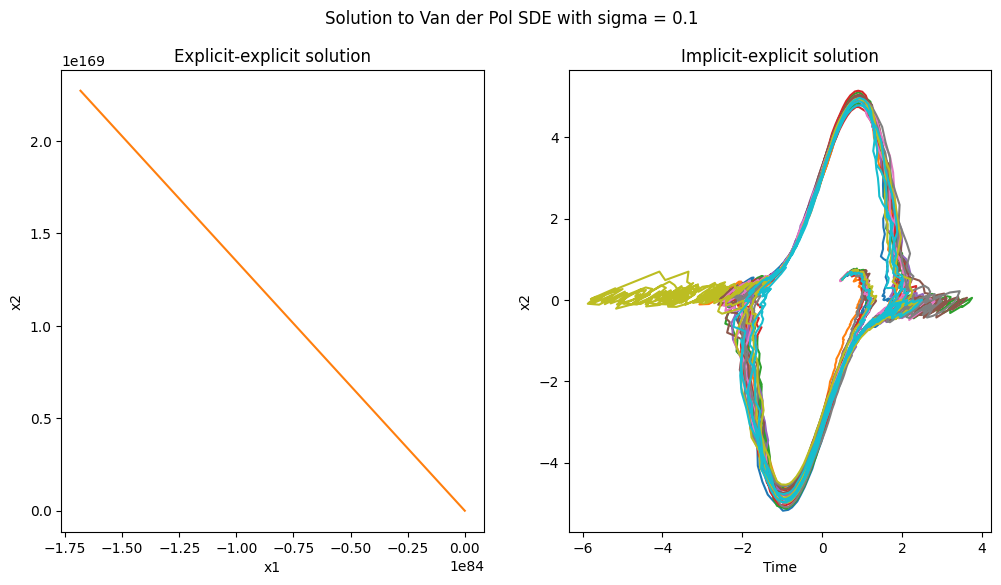

In [16]:

#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[0, :, i], X[1,:,i])
    ax2.plot(Xi[0, :, i], Xi[1,:,i])
ax1.set_title('Explicit-explicit solution')
ax2.set_title('Implicit-explicit solution')
ax1.set_ylabel('x2')
ax1.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlabel('x1')
plt.suptitle('Solution to Van der Pol SDE with sigma = 0.1')
ax2.set_xlabel('Time')
plt.show()

## CSTR 1 state

In [30]:
#Parameters
t_span = (0, 120)

min = 60
F = [0.7/min,0.6/min,0.5/min,0.4/min,0.3/min,0.2/min,0.3/min,0.4/min,0.5/min,0.6/min,0.7/min,0.7/min,0.2/min,0.2/min,0.7/min,0.7/min]

#F = np.arange(0.1, 0.7, 0.1)/min

t = np.array([])
Tf = np.array([])

Tin = 273.65
CB_in = 2.4/2
CA_in = 1.6/2

x0 = [Tin]

N = 1000

tf = t_span[1] - t_span[0]
nw = 1  # MUST match number of state variables (3 for CSTR 3 state model)
Ns = 10  # Number of realizations (sample paths)
seed = 100
lenF = len(F)

# Generate Wiener process with correct dimension
W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)

# Initialize arrays
X = np.zeros((lenF, N+1, Ns))  # For explicit solutions
Xi = np.zeros((lenF, N+1, Ns))  # For implicit solutions
Tf_f = np.zeros((lenF*(N+1), Ns))
t_f = np.zeros((lenF*(N+1), Ns))
Tfi_f = np.zeros((lenF*(N+1), Ns))
ti_f = np.zeros((lenF*(N+1), Ns))

Tf_concat = np.array([])
t_concat = np.array([])

Tfi_concat = np.array([])
ti_concat = np.array([])


for i in range(Ns):
    temp_Tf = []
    temp_t = []
    temp_Tfi = []
    temp_ti = []
    x0 = np.array([Tin])
    x0i = np.array([Tin])

    for idx, flow in enumerate(F):
        params = [flow,0.105,CA_in,CB_in,Tin]
        f, g, J = CSTR_1state_model(params, sde = True,sigma_T = 30)

        X[idx, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i]).flatten()
        Xi[idx, :, i] = SDEsolverImplicitExplicit(f, J, g, T, x0i, W[:, :, i]).flatten()

        # Store results
        temp_Tf.extend(X[idx, :, i] - Tin)
        temp_t.extend((T + idx*tf)/min)
        temp_Tfi.extend(Xi[idx, :, i] - Tin)
        temp_ti.extend((T + idx*tf)/min)
        # Update initial condition for next flow rate
        x0 = np.array([X[idx, -1, i]])
        x0i = np.array([Xi[idx, -1, i]])
    
    # Store concatenated results for this realization
    Tf_f[:, i] = temp_Tf
    t_f[:, i] = temp_t 
    Tfi_f[:, i] = temp_Tfi
    ti_f[:, i] = temp_ti  

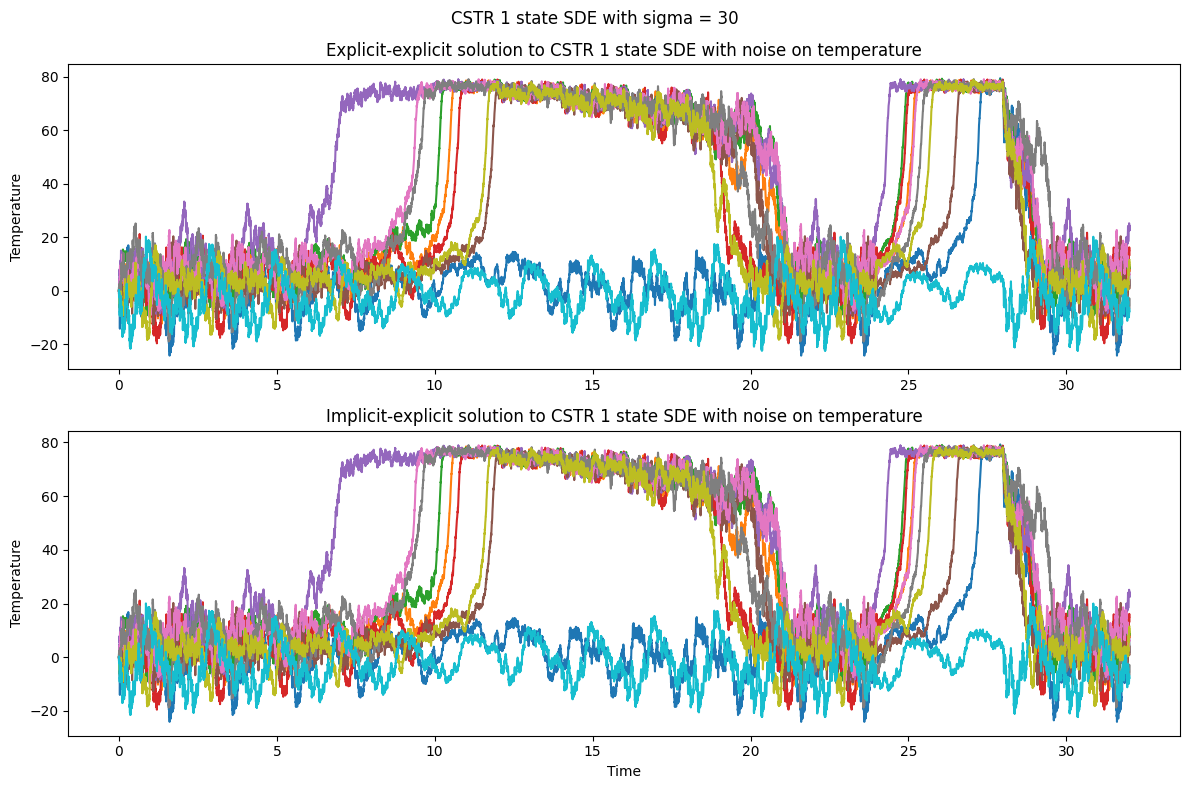

In [33]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
for i in range(Ns):
    ax1.plot(t_f[:,i], Tf_f[:,i])
    ax2.plot(ti_f[:,i], Tfi_f[:,i])
ax1.set_title('Explicit-explicit solution to CSTR 1 state SDE with noise on temperature')
ax2.set_title('Implicit-explicit solution to CSTR 1 state SDE with noise on temperature')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Time')
plt.suptitle('CSTR 1 state SDE with sigma = 30')
plt.tight_layout()
plt.show()

## PFR 3 state

In [38]:
# --- Parameters ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50  # number of spatial cells
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)
v = 400 / (1000 * 1000 * 60 * 0.1)  # F = 400 mL/min, A = 0.1 m^2

params = {
    "dz": dz,
    "v": v,
    "D": DT,
    "beta": beta,
    "k": k,
}

# --- Create model ---
f, g, J = PFR_1state_model(u=u, p=params, sigma_T = 0.01)

x0 = np.ones(n) * Tin

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)


tf = t_span[1] - t_span[0]
N = 1000


nw = 1
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((n, N+1, Ns))
Xi = np.zeros((n, N+1, Ns))
#T = np.zeros((n, N+1, Ns))
#Ti = np.zeros((n, N+1, Ns))


for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, J, g, T, x0, W[:, :, i])

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:179: RuntimeWarning: overflow encountered in multiply
  


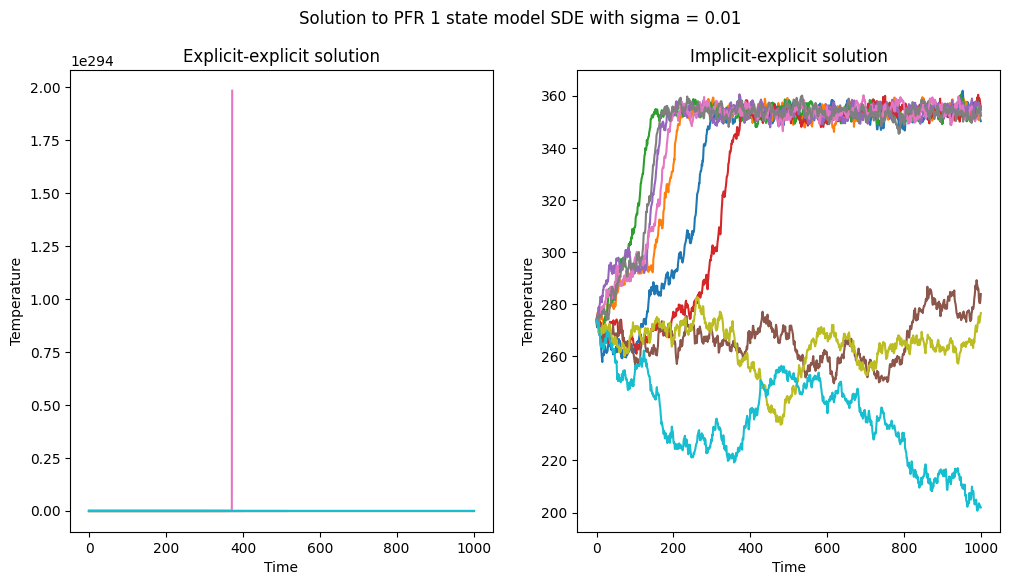

In [37]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[2, :, i])
    ax2.plot(Xi[2, :, i])
    #ax2.plot(Xi[0, :, i], Xi[1,:,i])
ax1.set_title('Explicit-explicit solution')
ax2.set_title('Implicit-explicit solution')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Time')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Time')
plt.suptitle('Solution to PFR 1 state model SDE with sigma = 0.01')
plt.show()

In [40]:
# --- Parameters ---
Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
u = [CA_in, CB_in, Tin]

n = 50  # number of spatial cells
dz = 10 / n
DT = 0.1
beta = 560.0 / 4.186
Ea_R = 8500.0
k = lambda T: np.exp(24.6) * np.exp(-Ea_R / T)
v = 400 / (1000 * 1000 * 60 * 0.1)  # F = 400 mL/min, A = 0.1 m^2

params = {
    "dz": dz,
    "v": v,
    "D": DT,
    "beta": beta,
    "k": k,
}

# --- Create model ---
f, g, J = PFR_1state_model(u=u, p=params, sigma_T = 0.1)

x0 = np.ones(n) * Tin

# --- Time domain ---
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)


tf = t_span[1] - t_span[0]
N = 1000


nw = 1
Ns = 10
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((n, N+1, Ns))
Xi = np.zeros((n, N+1, Ns))
#T = np.zeros((n, N+1, Ns))
#Ti = np.zeros((n, N+1, Ns))


for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i])
    Xi[:, :, i] = SDEsolverImplicitExplicit(f, J, g, T, x0, W[:, :, i])

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:202: RuntimeWarning: overflow encountered in square
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:151: RuntimeWarning: overflow encountered in exp
  return np.array([Tin*sigma_T])
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:206: RuntimeWarning: invalid value encountered in subtract
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:206: RuntimeWarning: overflow encountered in multiply
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/SDETestProblems.py:205: RuntimeWarning: overflow encounte

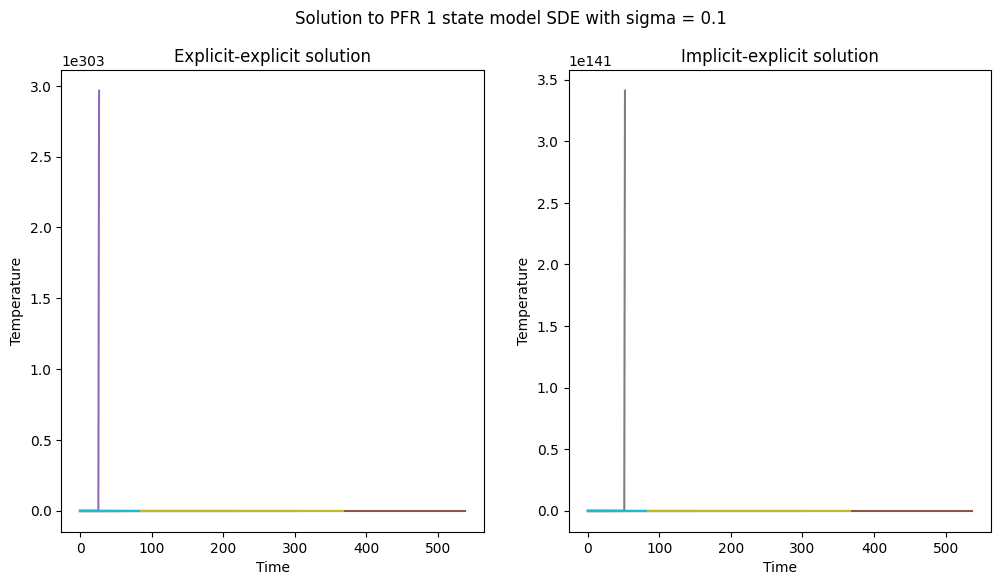

In [41]:
#Plot the results in two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(Ns):
    ax1.plot(X[2, :, i])
    ax2.plot(Xi[2, :, i])
    #ax2.plot(Xi[0, :, i], Xi[1,:,i])
ax1.set_title('Explicit-explicit solution')
ax2.set_title('Implicit-explicit solution')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Time')
ax2.set_ylabel('Temperature')
ax2.set_xlabel('Time')
plt.suptitle('Solution to PFR 1 state model SDE with sigma = 0.1')
plt.show()